# Classification problem: Predict Churn

In this project, you will create supervised models to predict which users are more likely to churn and stop using a cell phone service. You need to identify the most important factors that prevent users from churning and keep them retained in the system. 

## 1. Load Libraries
Pandas, Numpy and Sklearn are key libraries to develop the models.

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## 2. Load the dataset

In [168]:
df=pd.read_csv("churn.all2")

## 3. Descriptive Statistics

In [3]:
df.shape

(5000, 21)

The dataset consists of 5000 observations and 21 features.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
state                            5000 non-null object
account_length                   5000 non-null int64
area_code                        5000 non-null int64
phone_number                     5000 non-null object
intl_plan                        5000 non-null object
voice_mail_plan                  5000 non-null object
number_vmail_messages            5000 non-null int64
total_day_minutes                5000 non-null float64
total_day_calls                  5000 non-null int64
total_day_charge                 5000 non-null float64
total_eve_minutes                5000 non-null float64
total_eve_calls                  5000 non-null int64
total_eve_charge                 5000 non-null object
total_night_minutes              5000 non-null float64
total_night_calls                5000 non-null int64
total_night_charge               5000 non-null float64
total_intl_minutes            

Some of the features are objects, even though are numbers like "charge", so it should be explored deeply.

In [5]:
df.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,?,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


"churned" feature has a point at the end of the label; besides categorical binary variables should be switched to numerical ones, so the models can be run smoothly.

In [6]:
df.describe()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4999.000000,5000.000000
mean,100.25860,436.911400,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,200.391620,99.919200,9.017732,10.261780,4.435200,2.771146,1.570400
std,39.69456,42.209182,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,50.527789,19.958686,2.273763,2.761396,2.456788,0.745580,1.306363
min,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,408.000000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,100.00000,415.000000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.00000,415.000000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.00000,510.000000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


phone_number, account_length and area_code don't tell us much about customer behaviour, so they can be dropped from the dataset.

In [7]:
df=df.drop(['phone_number','account_length','area_code'], axis=1)

To know how many unique values has every feature will help us to make data wrangling later

In [8]:
for i in df:
    print("{} : {} unique values".format(i, df[i].nunique()))

state : 51 unique values
intl_plan : 2 unique values
voice_mail_plan : 2 unique values
number_vmail_messages : 48 unique values
total_day_minutes : 1961 unique values
total_day_calls : 123 unique values
total_day_charge : 1961 unique values
total_eve_minutes : 1879 unique values
total_eve_calls : 126 unique values
total_eve_charge : 1660 unique values
total_night_minutes : 1853 unique values
total_night_calls : 131 unique values
total_night_charge : 1028 unique values
total_intl_minutes : 170 unique values
total_intl_calls : 21 unique values
total_intl_charge : 170 unique values
number_customer_service_calls : 10 unique values
churned : 2 unique values


Variables like state, intl_plan, voice_mail_plan and churned have to be turned into numbers.

In [9]:
for i in ['voice_mail_plan', 'intl_plan', 'churned']:
    print("{}\n{}".format(i, df[i].value_counts()))

voice_mail_plan
 no     3677
 yes    1323
Name: voice_mail_plan, dtype: int64
intl_plan
 no     4527
 yes     473
Name: intl_plan, dtype: int64
churned
 False.    4293
 True.      707
Name: churned, dtype: int64


It is a unbalanced dataset for this churn classification, so needs to be addressed later when comparing recall and precision among models.

Switch to binary variable columns like intl_plan, voice_mail_plan, churned

In [10]:
df['intl_plan']=df.intl_plan.eq(' yes').mul(1)
df['voice_mail_plan']=df.voice_mail_plan.eq(' yes').mul(1)
df['churned']=df.churned.eq(' True.').mul(1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
state                            5000 non-null object
intl_plan                        5000 non-null int64
voice_mail_plan                  5000 non-null int64
number_vmail_messages            5000 non-null int64
total_day_minutes                5000 non-null float64
total_day_calls                  5000 non-null int64
total_day_charge                 5000 non-null float64
total_eve_minutes                5000 non-null float64
total_eve_calls                  5000 non-null int64
total_eve_charge                 5000 non-null object
total_night_minutes              5000 non-null float64
total_night_calls                5000 non-null int64
total_night_charge               5000 non-null float64
total_intl_minutes               5000 non-null float64
total_intl_calls                 5000 non-null int64
total_intl_charge                4999 non-null float64
number_customer_service_calls

So now the dataset contains numerical variables, except total_eve_charge that is an object Dtype and could have missing values and besides intl_charge has null values. Let's transform total_eve_charge to a numerical variable.

In [12]:
df.total_eve_charge=pd.to_numeric(df['total_eve_charge'],errors='coerce')

Let's discover null values from the entire dataset.

In [13]:
null_rows=df[df.isnull().any(axis=1)]
null_rows

,state,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
1,OH,0,1,26,161.6,123,27.47,195.5,103,NaN,254.4,103,11.45,13.7,3,3.70,1,0
5,AL,1,0,0,223.4,98,37.98,220.6,101,NaN,203.9,118,9.18,6.3,6,1.70,0,0
9,WV,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,NaN,0,0
20,FL,0,0,0,155.1,117,26.37,239.7,93,NaN,208.8,133,9.40,10.6,4,2.86,0,0
34,OK,0,1,25,176.8,94,30.06,195.0,75,NaN,213.5,116,9.61,8.3,4,2.24,0,0
50,IA,0,0,0,191.9,108,32.62,269.8,96,NaN,236.8,87,10.66,7.8,5,2.11,3,0


6 rows has null values. I have two alternatives: do imputation using mean, median, knn, or regression; or drop the lines. Let's do a scatter plot to evaluate the alternatives.

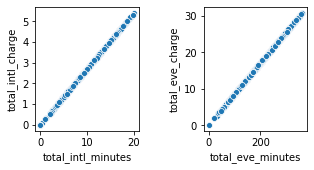

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(5, 3))
sns.scatterplot(ax=axes[0], data=df, x="total_intl_minutes", y="total_intl_charge")
sns.scatterplot(ax=axes[1], data=df, x='total_eve_minutes', y='total_eve_charge')
plt.tight_layout(3.0)


Let's do imputation using regression since their relationship is linear

# 4. Handling null values

Predicting null values for total_intl_charge

In [18]:
#Create a subset of data where there are no missing values for INTL min and charge.
df_imputation=df.dropna(axis=0,subset=['total_intl_minutes','total_intl_charge'])
df_imputation=df_imputation.loc[:,['total_intl_minutes','total_intl_charge']]

#find the entries with total_bill missing
missing_charge=df['total_intl_charge'].isnull()

#extract the intl_minutes of observations with total_intl_charge missing
missing_minute=pd.DataFrame(df['total_intl_minutes'][missing_charge])
missing_minute

,total_intl_minutes
9,11.2


In [19]:
X=df_imputation[['total_intl_minutes']] ##dataset, not series
y=df_imputation['total_intl_charge']

#train a linear model regressing total_int charge on minutes useing 80% training and 20% testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
lm=LinearRegression().fit(X_train,y_train)
charge_pred=lm.predict(missing_minute)
charge_pred

array([3.02452135])

This prediction was added with fillna method, since it is one value.

In [20]:
df.total_intl_charge.fillna(value = round(float(charge_pred),2), inplace = True)

In [21]:
df.head(10)

,state,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,0,1,26,161.6,123,27.47,195.5,103,NaN,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,AL,1,0,0,223.4,98,37.98,220.6,101,NaN,203.9,118,9.18,6.3,6,1.70,0,0
6,MA,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
7,MO,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0
8,LA,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
9,WV,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0


Predicting null values for eve_charge

In [22]:
#no missing data for eve_charge and eve_min
df_imputation=df.dropna(axis=0,subset=['total_eve_minutes', 'total_eve_charge'])
df_imputation=df_imputation.loc[:,['total_eve_minutes', 'total_eve_charge']]

#find the entries with total_bill missing
missing_charge=df['total_eve_charge'].isnull()

#extract the intl_minutes of observations with total_intl_charge missing
missing_minute=pd.DataFrame(df['total_eve_minutes'][missing_charge])
missing_minute

,total_eve_minutes
1,195.5
5,220.6
20,239.7
34,195.0
50,269.8


In [23]:
X=df_imputation[['total_eve_minutes']]
y=df_imputation[['total_eve_charge']]

#train a linear model regressing total_int charge on minutes using 80% training and 20% testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
lm=LinearRegression().fit(X_train,y_train)
#create a new colum to save predicted values
df['charge_eve_pred']=lm.predict(df[['total_eve_minutes']])

In [24]:
#fill na values with charge_eve_pred and then drop this column
df['total_eve_charge']=df.total_eve_charge.fillna(value = round(df.charge_eve_pred,2), axis=0)
df=df.drop(['charge_eve_pred'],axis=1)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
state                            5000 non-null object
intl_plan                        5000 non-null int64
voice_mail_plan                  5000 non-null int64
number_vmail_messages            5000 non-null int64
total_day_minutes                5000 non-null float64
total_day_calls                  5000 non-null int64
total_day_charge                 5000 non-null float64
total_eve_minutes                5000 non-null float64
total_eve_calls                  5000 non-null int64
total_eve_charge                 5000 non-null float64
total_night_minutes              5000 non-null float64
total_night_calls                5000 non-null int64
total_night_charge               5000 non-null float64
total_intl_minutes               5000 non-null float64
total_intl_calls                 5000 non-null int64
total_intl_charge                5000 non-null float64
number_customer_service_call

After cleansing the dataset, let's do some visualizations to find correlations and/or outliers that can impact model's performance.

# 5. Visualizations

Let's understand correlations between variables.

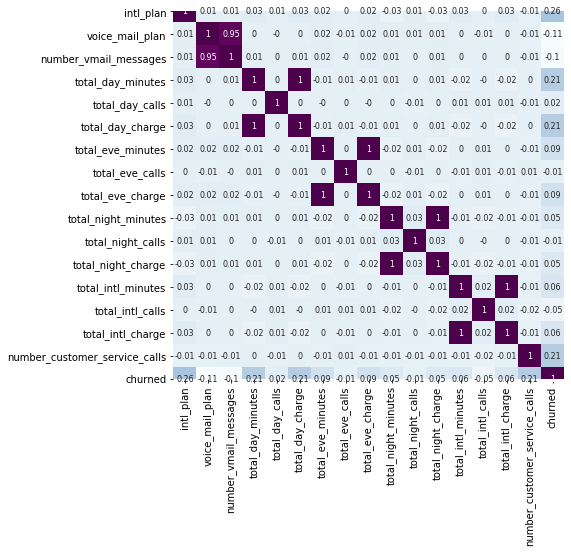

In [32]:
corr_df = df.iloc[:, :].corr().round(2) # rounding to 1 decimal point to make it easier to observe correlated features
plt.figure(figsize=(7, 7))
sns.heatmap(corr_df, cmap='BuPu',annot=True, square=True, annot_kws=dict(size=8), cbar=False)
plt.show()

It could be dropped 'total_day_minutes','total_eve_minutes','total_night_minutes','total_intl_minutes','number_vmail_messages' to address this multi-collinearity problem. They have highly corralated variables to them.

In [33]:
df = df.drop(['total_day_minutes','total_eve_minutes','total_night_minutes','total_intl_minutes','number_vmail_messages'], axis = 1)

In [34]:
df.head()

,state,intl_plan,voice_mail_plan,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,0,1,110,45.07,99,16.78,91,11.01,3,2.70,1,0
1,OH,0,1,123,27.47,103,16.62,103,11.45,3,3.70,1,0
2,NJ,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0
3,OH,1,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0
4,OK,1,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0


There are some continuous and discrete variables so it is time to evaluate trends with pairplot from Seaborn.

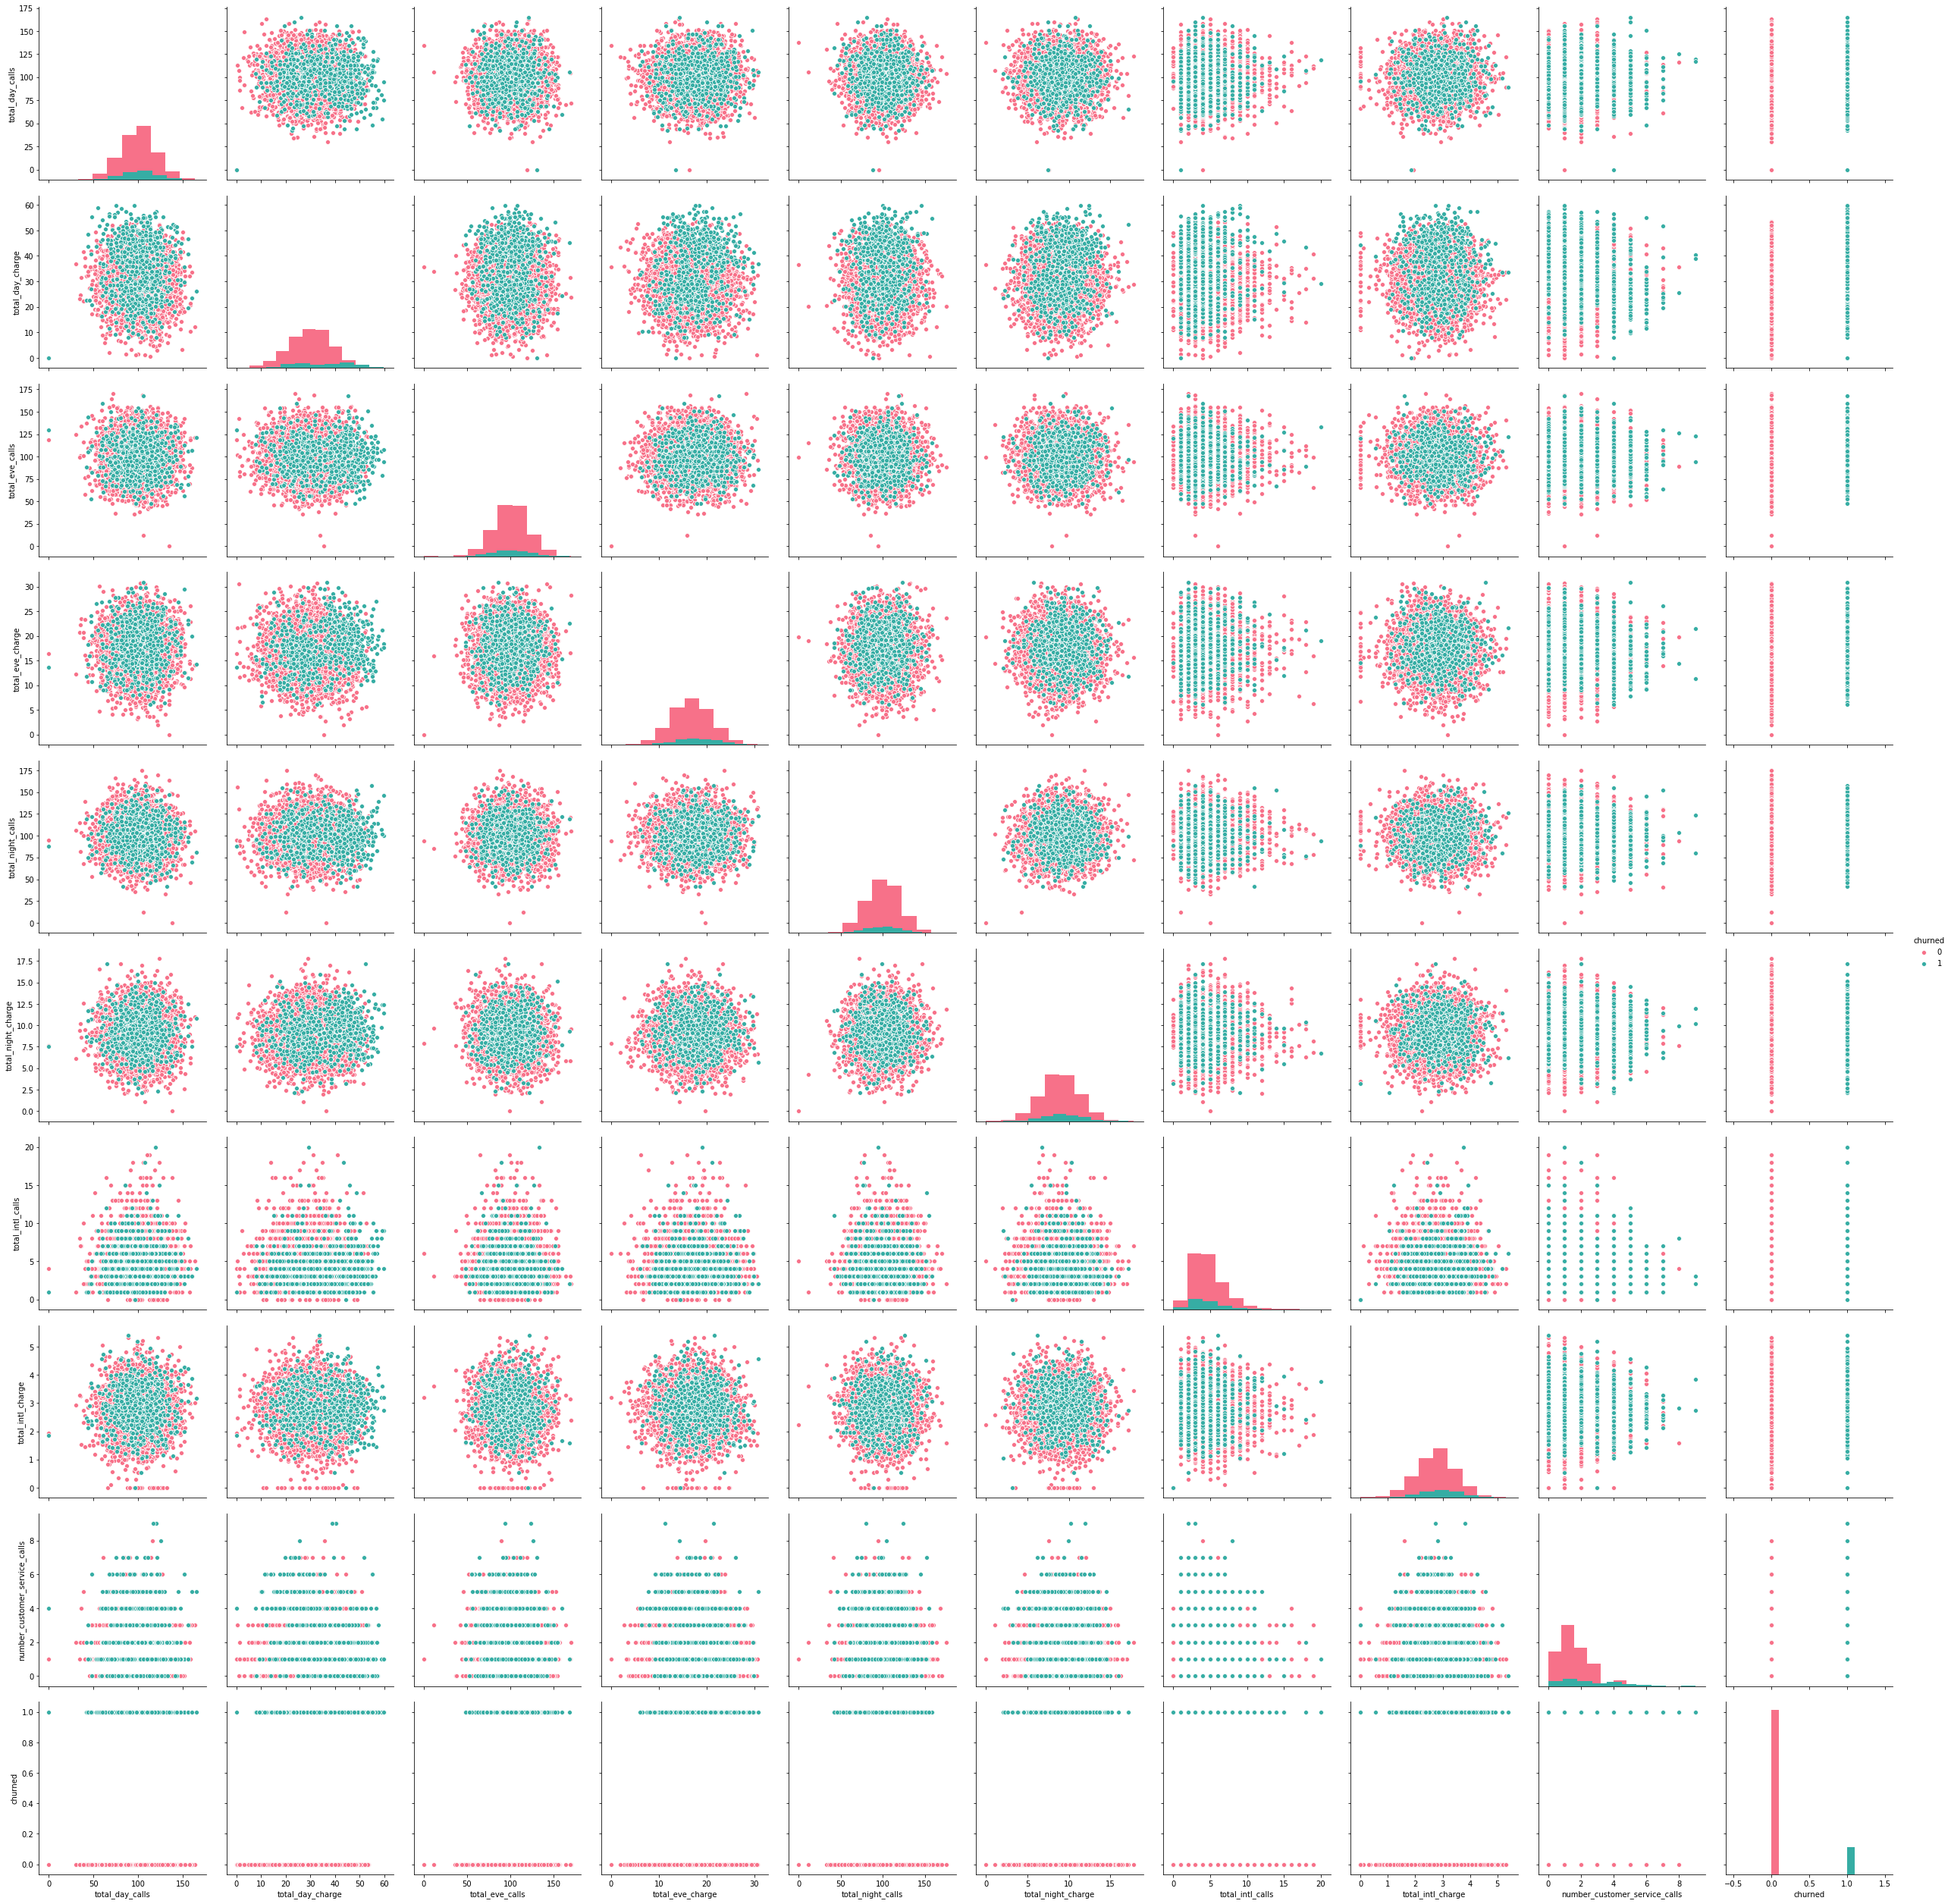

In [35]:
sns.pairplot(df.drop(['intl_plan','voice_mail_plan'],axis=1),hue='churned',diag_kind='hist',palette="husl",height=3.5)

"State" categorical variable can be explored with barplot.

In [37]:
#Continuous Variables over State (Categorical)
df1=df.groupby('state')['total_day_charge'].sum().sort_values(ascending=False)
df2=df.groupby('state')['total_eve_charge'].sum().sort_values(ascending=False)
df3=df.groupby('state')['total_night_charge'].sum().sort_values(ascending=False)
df4=df.groupby('state')['total_intl_charge'].sum().sort_values(ascending=False)

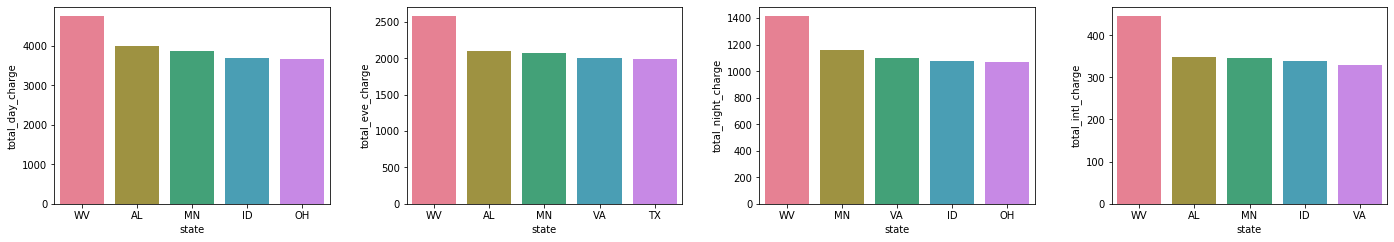

In [38]:
fig, axes = plt.subplots(1, 4, figsize=(20, 4))
sns.barplot(ax=axes[0],x=df1[:5,].index,y=df1[:5,], palette="husl")
sns.barplot(ax=axes[1],x=df2[:5,].index,y=df2[:5,], palette="husl")
sns.barplot(ax=axes[2],x=df3[:5,].index,y=df3[:5,], palette="husl")
sns.barplot(ax=axes[3],x=df4[:5,].index,y=df4[:5,], palette="husl")
plt.tight_layout(3.0)

West Virginia customers has the highest charge for day, evening, night and international calls.

In [39]:
#Discrete Variables over State (Categorical)
df1=df.groupby('state')['total_day_calls'].sum().sort_values(ascending=False)
df2=df.groupby('state')['total_eve_calls'].sum().sort_values(ascending=False)
df3=df.groupby('state')['total_night_calls'].sum().sort_values(ascending=False)
df4=df.groupby('state')['total_intl_calls'].sum().sort_values(ascending=False)
df5=df.groupby('state')['number_customer_service_calls'].sum().sort_values(ascending=False)
sns.set(font_scale=1.5)
sns.set_style("white")

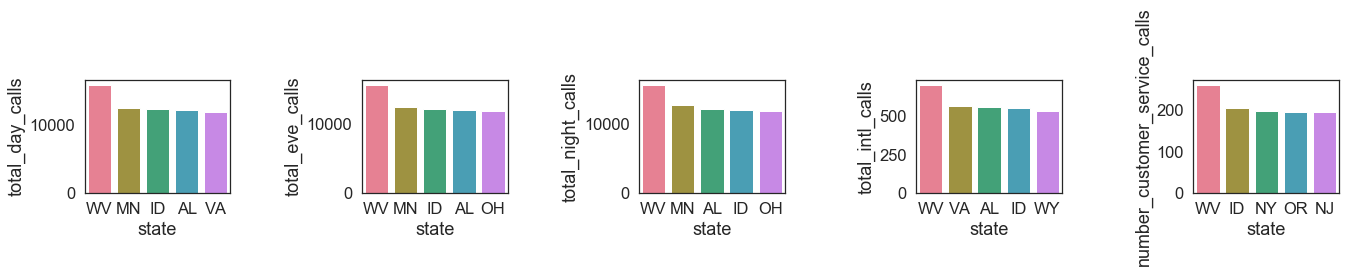

In [40]:
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
sns.barplot(ax=axes[0],x=df1[:5,].index,y=df1[:5,], palette="husl")
sns.barplot(ax=axes[1],x=df2[:5,].index,y=df2[:5,], palette="husl")
sns.barplot(ax=axes[2],x=df3[:5,].index,y=df3[:5,], palette="husl")
sns.barplot(ax=axes[3],x=df4[:5,].index,y=df4[:5,], palette="husl")
sns.barplot(ax=axes[4],x=df5[:5,].index,y=df5[:5,], palette="husl")
plt.tight_layout(3.0)

West Virginia customers make the same amount of calls during day, evening and nights. Besides they have the highest number of calls to customer service.

Now, let's look for outliers using boxplot from seaborn catplot for every numerical variable.

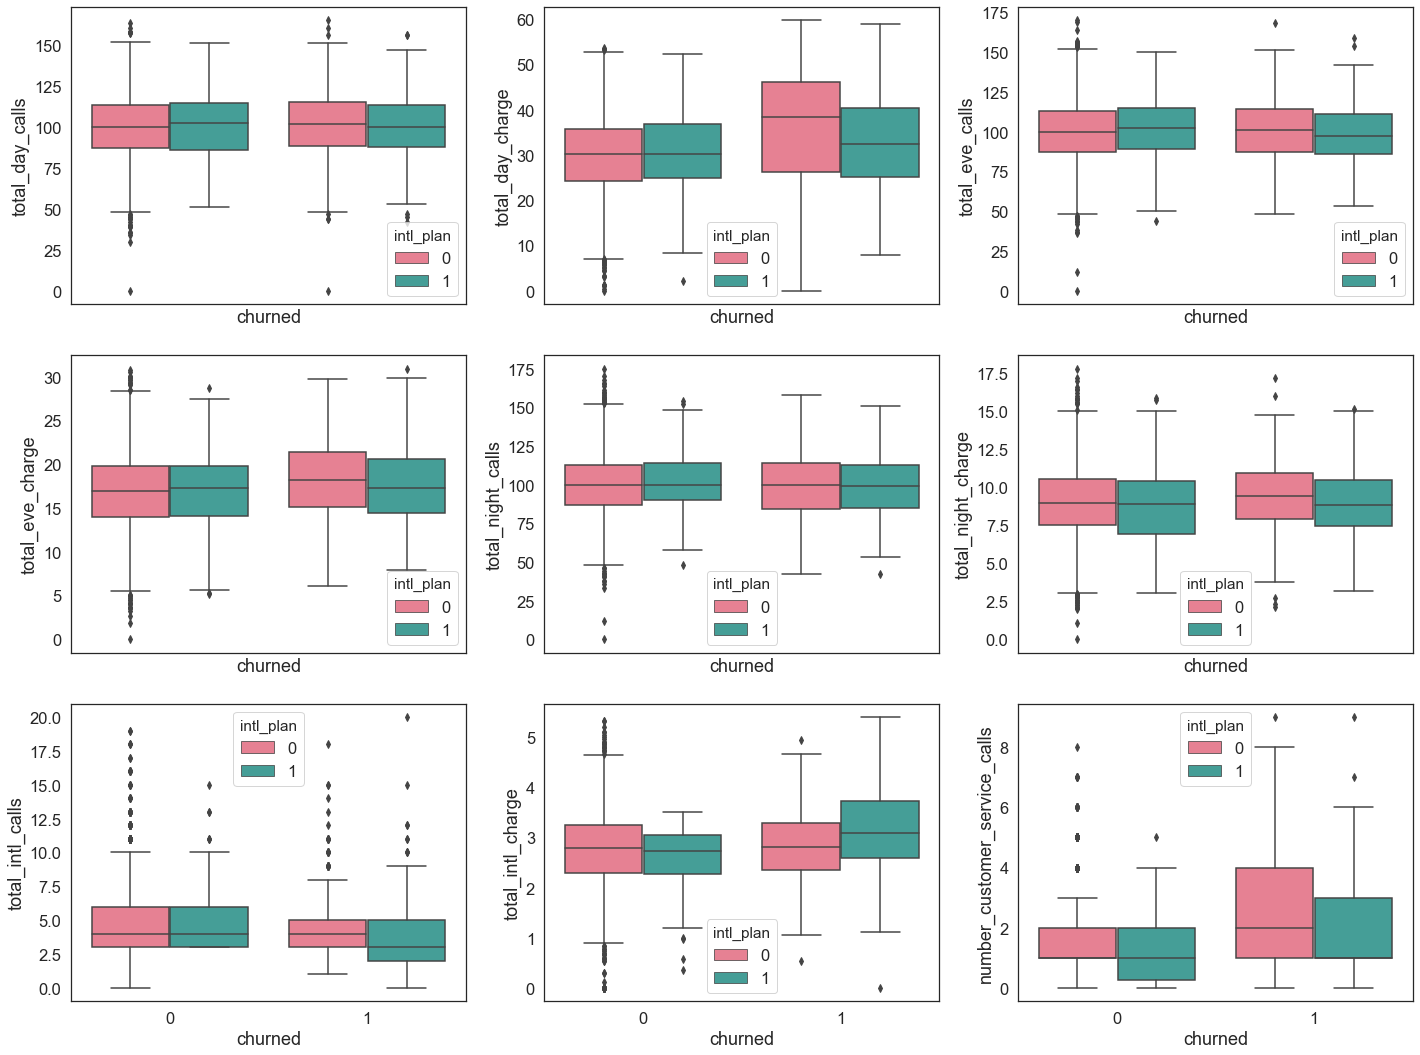

In [43]:
df_cont=df.iloc[:,3:13]

fig, axes =plt.subplots(3,3, figsize=(20,15), sharex=True)
axes = axes.flatten()
for ax, feat in zip(axes, df_cont.columns):
        sns.catplot(ax=ax,y=feat, x='churned', hue='intl_plan', kind='box', data=df, palette="husl")
        plt.close()
plt.tight_layout()  
plt.show()


Total_intl_calls variable shows outliers for all churned category. However, the rest of the variables display outliers just on negative churned variable, it means customers who stay in the telco company.  A good strategy to deal with outliers is with the use of Scalers. In the next step, standarization will be used as part of the pipeline to train the model.

# 6. Evaluate algorithms

Transform  "state" to dummies and save to a new variable to evaluate its impact on the models, but my first approach is to drop it, because state doesn't look like a good customer behaviour predictor.

In [2768]:
dummies = pd.get_dummies(df['state']).rename(columns=lambda x: 'Category_' + str(x))
df_w_dummies = pd.concat([df, dummies], axis=1)
df_w_dummies.drop(['state'], axis=1,inplace=True)
df_w_dummies.head()

,intl_plan,voice_mail_plan,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,...,Category_SD,Category_TN,Category_TX,Category_UT,Category_VA,Category_VT,Category_WA,Category_WI,Category_WV,Category_WY
0,0,1,110,45.07,99,16.78,91,11.01,3,2.70,...,0,0,0,0,0,0,0,0,0,0
1,0,1,123,27.47,103,16.62,103,11.45,3,3.70,...,0,0,0,0,0,0,0,0,0,0
2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,...,0,0,0,0,0,0,0,0,0,0
3,1,0,71,50.90,88,5.26,89,8.86,7,1.78,...,0,0,0,0,0,0,0,0,0,0
4,1,0,113,28.34,122,12.61,121,8.41,3,2.73,...,0,0,0,0,0,0,0,0,0,0


First, let's train the models without state.

In [101]:
# Separate features and target
X = df.drop(['churned','state'], axis = 1)
y = df['churned']

print(X.shape)
print(y.shape)

(5000, 11)
(5000,)


In [64]:
X_train, X_test,y_train,y_test=train_test_split(X,y,stratify=y, random_state=1)


## Logistic Regression

### Unbalanced Dataset

In [118]:
##Every distributions is close to normal so let's use StandardScaler to standarize the data. 
pipe=make_pipeline(StandardScaler(), 
                   LogisticRegression(solver='lbfgs', penalty='l2', random_state=2))
grid_lr=GridSearchCV(pipe,param_grid={'logisticregression__C':np.logspace(-3,3,7)},cv=10, refit=True)
grid_lr.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('logisticregression',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                    

In [119]:
print('Score on training data: ', grid_lr.score(X_train, y_train))
print('Score on test data: ', grid_lr.score(X_test, y_test))
print("Tuned hyperparameters :(best parameters) ",grid_lr.best_params_)
print("Best_score :",grid_lr.best_score_)

Score on training data:  0.8674666666666667
Score on test data:  0.8656
Tuned hyperparameters :(best parameters)  {'logisticregression__C': 0.01}
Best_score : 0.8664


In [120]:
predictions=grid_lr.predict(X_test)
confusion=confusion_matrix(y_test,predictions,labels=[1,0])
print(confusion)

[[  25  152]
 [  16 1057]]


In [121]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))

Accuracy score: 0.87
Precision score: 0.61
Recall score: 0.14
F1 score: 0.23


It was improved my model, adding L2 (Ridge) penalization for large weight coefficients. Let's analyze a balanced dataset

### Balanced Dataset

In [122]:
#fractions = {"False": 0.1703, "True": 1.0}
churn_DF = df[df['churned']==0].sample(frac=0.16, replace=True, random_state=1)

In [123]:
churn_DF1=df[df['churned']==1]

In [124]:
df_balanced=pd.concat([churn_DF,churn_DF1],ignore_index=True)

In [125]:
df_balanced['churned'].value_counts()

1    707
0    687
Name: churned, dtype: int64

In [126]:
# Separate features and target
X = df_balanced.drop(['churned','state'], axis = 1)
y = df_balanced['churned']

print(X.shape)
print(y.shape)

(1394, 11)
(1394,)


In [127]:
X_train_bal, X_test_bal,y_train_bal,y_test_bal=train_test_split(X,y,stratify=y, random_state=2)

In [128]:
grid_lr.fit(X_train_bal, y_train_bal)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('logisticregression',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                    

In [129]:
print('Score on training data: ', grid_lr.score(X_train_bal, y_train_bal))
print('Score on test data: ', grid_lr.score(X_test_bal, y_test_bal))
print("Tuned hyperparameters :(best parameters) ",grid_lr.best_params_)
print("Best_score :",grid_lr.best_score_)

Score on training data:  0.7799043062200957
Score on test data:  0.7621776504297995
Tuned hyperparameters :(best parameters)  {'logisticregression__C': 0.01}
Best_score : 0.7732057416267942


In [130]:
predictions=grid_lr.predict(X_test_bal)
confusion=confusion_matrix(y_test_bal,predictions,labels=[1,0])
print(confusion)

[[129  48]
 [ 35 137]]


In [131]:
accuracy = accuracy_score(y_test_bal, predictions)
precision = precision_score(y_test_bal, predictions)
recall = recall_score(y_test_bal, predictions)
f1 = f1_score(y_test_bal, predictions)

print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))

Accuracy score: 0.76
Precision score: 0.79
Recall score: 0.73
F1 score: 0.76


Improved precision and recall. A high FN is important to take care, because it can cause a client leaving the company whithout noticing. Recall is the metric I need to improve in order to predict churn.

In [132]:
report = classification_report(y_test_bal, predictions, target_names=['Not Churned', 'Churned'])
print(report)

              precision    recall  f1-score   support

 Not Churned       0.74      0.80      0.77       172
     Churned       0.79      0.73      0.76       177

    accuracy                           0.76       349
   macro avg       0.76      0.76      0.76       349
weighted avg       0.76      0.76      0.76       349



## K Nearest Neighbor

### Unbalanced Dataset

In [133]:
from sklearn.neighbors import KNeighborsRegressor

param_grid = {'kneighborsclassifier__n_neighbors': np.arange(1,30,2)}
pipe=make_pipeline(StandardScaler(), KNeighborsClassifier())
grid_knn=GridSearchCV(pipe,param_grid=param_grid,cv=10, refit=True)
grid_knn.fit(X_train, y_train)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                 

In [134]:
print('Score on training data: ', grid_knn.score(X_train, y_train))
print('Score on test data: ', grid_knn.score(X_test, y_test))
print("Tuned hyperparameters :(best parameters) ",grid_knn.best_params_)
print("Best_score :",grid_knn.best_score_)

Score on training data:  0.9138666666666667
Score on test data:  0.8944
Tuned hyperparameters :(best parameters)  {'kneighborsclassifier__n_neighbors': 9}
Best_score : 0.9016


In [135]:
predictions=grid_knn.predict(X_test)
confusion=confusion_matrix(y_test,predictions,labels=[1,0])
print(confusion)

[[  56  121]
 [  11 1062]]


In [137]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))

Accuracy score: 0.89
Precision score: 0.84
Recall score: 0.32
F1 score: 0.46


KNN improved accuracy over Logistic Regression. Let's analyze a balanced dataset

### Balanced Dataset

In [138]:
grid_knn.fit(X_train_bal, y_train_bal)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                 

In [139]:
print('Score on training data: ', grid_knn.score(X_train_bal, y_train_bal))
print('Score on test data: ', grid_knn.score(X_test_bal, y_test_bal))
print("Tuned hyperparameters :(best parameters) ",grid_knn.best_params_)
print("Best_score :",grid_knn.best_score_)

Score on training data:  0.8593301435406698
Score on test data:  0.8080229226361032
Tuned hyperparameters :(best parameters)  {'kneighborsclassifier__n_neighbors': 11}
Best_score : 0.8248803827751197


In [140]:
predictions=grid_knn.predict(X_test_bal)
confusion=confusion_matrix(y_test_bal,predictions,labels=[1,0])
print(confusion)

[[132  45]
 [ 22 150]]


In [141]:
accuracy = accuracy_score(y_test_bal, predictions)
precision = precision_score(y_test_bal, predictions)
recall = recall_score(y_test_bal, predictions)
f1 = f1_score(y_test_bal, predictions)

print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))

Accuracy score: 0.81
Precision score: 0.86
Recall score: 0.75
F1 score: 0.80


Recall score improved to 0.75. Let's try SVC algorithm

# SVC

### Unbalanced Dataset

In [145]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [146]:
param_grid = {'svc__C': np.logspace(-3,2,6),
             'svc__gamma':np.logspace(-3,2,6)/X_train.shape[0]}
pipe=make_pipeline(StandardScaler(), SVC())
grid_svc=GridSearchCV(pipe,param_grid=param_grid,cv=10)
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('svc',
                                        SVC(C=1.0, cache_size=200,
                                            class_weight=None, coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='auto_deprecated',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.001, verbose=False))],
       

In [147]:
print('Score on training data: ', grid_svc.score(X_train, y_train))
print('Score on test data: ', grid_svc.score(X_test, y_test))
print("Tuned hyperparameters :(best parameters) ",grid_svc.best_params_)
print("Best_score :",grid_svc.best_score_)

Score on training data:  0.9717333333333333
Score on test data:  0.936
Tuned hyperparameters :(best parameters)  {'svc__C': 100.0, 'svc__gamma': 0.02666666666666667}
Best_score : 0.94


In [148]:
predictions=grid_svc.predict(X_test)
confusion=confusion_matrix(y_test,predictions,labels=[1,0])
print(confusion)

[[ 122   55]
 [  25 1048]]


In [150]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)


print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))

Accuracy score: 0.94
Precision score: 0.83
Recall score: 0.69
F1 score: 0.75


The model is not overfitting, since test data set score is better than training score. Besides it was improved accuracy and recall. Let's try a balanced dataset.

### Balanced Dataset

In [151]:
grid_svc.fit(X_train_bal, y_train_bal)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('svc',
                                        SVC(C=1.0, cache_size=200,
                                            class_weight=None, coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='auto_deprecated',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.001, verbose=False))],
       

In [152]:
print('Score on training data: ', grid_svc.score(X_train_bal, y_train_bal))
print('Score on test data: ', grid_svc.score(X_test_bal, y_test_bal))
print("Tuned hyperparameters :(best parameters) ",grid_svc.best_params_)
print("Best_score :",grid_svc.best_score_)

Score on training data:  0.939712918660287
Score on test data:  0.828080229226361
Tuned hyperparameters :(best parameters)  {'svc__C': 100.0, 'svc__gamma': 0.02666666666666667}
Best_score : 0.8488038277511962


In [153]:
predictions=grid_svc.predict(X_test_bal)
confusion=confusion_matrix(y_test_bal,predictions,labels=[1,0])
print(confusion)

[[141  36]
 [ 24 148]]


In [154]:
accuracy = accuracy_score(y_test_bal, predictions)
precision = precision_score(y_test_bal, predictions)
recall = recall_score(y_test_bal, predictions)
f1 = f1_score(y_test_bal, predictions)

print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))

Accuracy score: 0.83
Precision score: 0.85
Recall score: 0.80
F1 score: 0.82


It was improved recall to 0.80, but the model is overfitting. Let's try  Random Forest.

# Random Forest

### Unbalanced Dataset

In [166]:
model_params = {
    'n_estimators': [50, 150, 250],
    'max_features': ['sqrt', 0.25, 0.5, 0.75, 1.0],
    'min_samples_split': [2, 4, 6]
}

# create random forest classifier model
rf_model = RandomForestClassifier(random_state=2)

# set up grid search meta-estimator
grid_rf = GridSearchCV(rf_model, model_params, cv=5)

# train the grid search meta-estimator to find the best model
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=2,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'m

In [156]:
print('Score on training data: ', grid_rf.score(X_train, y_train))
print('Score on test data: ', grid_rf.score(X_test, y_test))
print("Tuned hyperparameters :(best parameters) ",grid_rf.best_params_)
print("Best_score :",grid_rf.best_score_)

Score on training data:  0.9957333333333334
Score on test data:  0.9512
Tuned hyperparameters :(best parameters)  {'max_features': 0.75, 'min_samples_split': 4, 'n_estimators': 50}
Best_score : 0.9573333333333334


Some overfitting was found when it was compared score on test data to training data.

In [157]:
predictions=grid_rf.predict(X_test)
confusion=confusion_matrix(y_test,predictions,labels=[1,0])
print(confusion)

[[ 129   48]
 [  13 1060]]


In [158]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)


print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))


Accuracy score: 0.95
Precision score: 0.91
Recall score: 0.73
F1 score: 0.81


### Balanced Dataset

In [159]:
grid_rf.fit(X_train_bal, y_train_bal)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=2,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'m

In [160]:
print('Score on training data: ', grid_rf.score(X_train_bal, y_train_bal))
print('Score on test data: ', grid_rf.score(X_test_bal, y_test_bal))
print("Tuned hyperparameters :(best parameters) ",grid_rf.best_params_)
print("Best_score :",grid_rf.best_score_)

Score on training data:  1.0
Score on test data:  0.8595988538681948
Tuned hyperparameters :(best parameters)  {'max_features': 0.75, 'min_samples_split': 2, 'n_estimators': 250}
Best_score : 0.8995215311004785


In [161]:
X_test_bal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349 entries, 43 to 1331
Data columns (total 11 columns):
intl_plan                        349 non-null int64
voice_mail_plan                  349 non-null int64
total_day_calls                  349 non-null int64
total_day_charge                 349 non-null float64
total_eve_calls                  349 non-null int64
total_eve_charge                 349 non-null float64
total_night_calls                349 non-null int64
total_night_charge               349 non-null float64
total_intl_calls                 349 non-null int64
total_intl_charge                349 non-null float64
number_customer_service_calls    349 non-null int64
dtypes: float64(4), int64(7)
memory usage: 32.7 KB


In [162]:
predictions=grid_rf.predict(X_test_bal)
confusion=confusion_matrix(y_test_bal,predictions,labels=[1,0])
print(confusion)

[[143  34]
 [ 15 157]]


In [163]:
accuracy = accuracy_score(y_test_bal, predictions)
precision = precision_score(y_test_bal, predictions)
recall = recall_score(y_test_bal, predictions)
f1 = f1_score(y_test_bal, predictions)

print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))

Accuracy score: 0.86
Precision score: 0.91
Recall score: 0.81
F1 score: 0.85


It was improved recall score to 0.81, but the model is overfitting too.

### Conclusions

#### Highest Accuracy score: 0.95

Unbalanced Dataset

Algorithm: Random Forest

Parameters: 'max_features': 0.5, 'min_samples_split': 4, 'n_estimators': 150
                

Even though this model shows the highest accuracy, as the company needs to address the churn problem, accuracy is not the metric I need to look into.

A high false negatives mean I predict less customers leaving the company than are actually leaving, an error that could cost millions of dollars. So, to address this problem, I should look into factors that drive a low false negative, and lead us to a high recall, the key metric to analyze for this churn problem.


#### Highest Recall score: 0.81

Balanced Dataset

Algorithm: Random Forest

Parameters:  {'max_features': 0.75, 'min_samples_split': 2, 'n_estimators': 250}

This model has the highest Recall, it means lower False Negative, what I was looking for, but I created an overfitted model, with a training score of 1, and test score of 0.86.

So next steps to correct this model are parameter tuning, and working on outliers.

